In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2024-07-06 / Aki Taanila


# Seaborn

Matplotlib on grafiikan peruspaketti. Seaborn on matplotlibin päälle rakennettu grafiikka-paketti, joka tarjoaa helppoja tapoja kaavioiden luontiin suoraan datasta. Kaavioita voin muotoilla kuten mitä tahansa matplotlib-kaavioita, joten muotoilu edellyttää matplotlib-osaamista.

Tässä muistiossa on esimerkkejä seuraavista kaaviolajeista:

* **countplot** - lukumääräyhteeveto kategoriselle muuttujalle
* **histplot** -  luokiteltu jakauma määrälliselle muuttujalle
* **barplot** - virhemarginaaleilla varustettu pylväskaavio keskiarvoista
* **boxplot** - viiden luvun yhteeveto (pienin, alaneljännes, mediaani, yläneljännes, suurin)
* **scatterplot** - hajontakaavio, joka havainnollistaa kahden määrällisen muuttujan välistä riippuvuutta
* **jointplot** - hajontakaavio täydennettynä muuttujien jakaumilla

Tässä muistiossa on myös esimerkkejä usean kaavion kuvioista käyttäen **catplot**-, **displot**- ja **relplot**-funktioita.

Seaborn-kaavioita on helppo laatia, jos muistaa keskeiset parametrit:

* **data**
* **x**
* **y**
* **hue** (minkä muuttujan mukaan tehdään värierottelu?)
* **row** (yhdistelmäkaavioiden catplot, displot ja relplot yhteydessä)
* **col** (yhdistelmäkaavioiden catplot, displot ja relplot yhteydessä)
* **kind** (kaaviolaji yhdistelmäkaavioiden catplot, displot ja relplot yhteydessä)


## Seaborn-kaavioiden värit ja koot

Kaavion luonnissa voin määrittää värin **color**-parametrin arvona. Esimerkiksi tämän muistion ensimmäiseen kaavioon saan pylväille vihreän värin seuraavasti: `sns.countplot(data=tips, x='size', color='green')`. Reunavärin voin määrittää **edgecolor**-parametrilla.

* Värejä: https://matplotlib.org/stable/gallery/color/named_colors.html

Kaavion luonnissa voit määrittää käytettävän värikartan **palette**-parametrilla.

* Värikarttoja: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Yksittäisen kaavion koon voin määrittää luomalla kaaviota ympäröivän kuvion (figure) ennen kaavion luomista. Esimerkiksi `plt.figure(figsize=(10,6))`.

Yhdistelmäkaavion (catplot, displot, relplot, jointplot) kokoa säädän **height**- ja **aspect**-parametreillä.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Käytetään valmista tyylimäärittelyä (vaihtoehtoja 'darkgrid', 'white', 'dark')
sns.set_style('whitegrid')

In [3]:
tips = sns.load_dataset('tips')    # Esimerkkidata ravintolaseurueiden tipeistä
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## countplot

Sopii kategoristen muuttujien lukumääräyhteenvetoihin: https://seaborn.pydata.org/generated/seaborn.countplot.html

<Axes: xlabel='size', ylabel='count'>

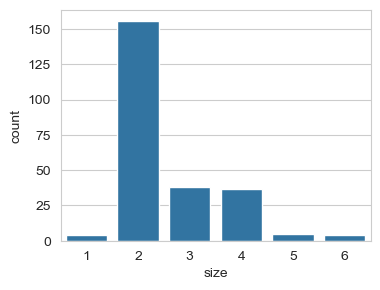

In [4]:
# Eri kokoisten seurueiden lukumäärät
plt.figure(figsize=(4, 3))
sns.countplot(data=tips, x='size')

<Axes: xlabel='day', ylabel='count'>

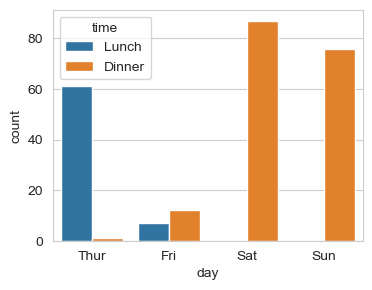

In [5]:
# Lounas- ja päivällisseurueiden lukumäärät eri viikonpäivinä
plt.figure(figsize=(4, 3))
sns.countplot(data=tips, x='day', hue='time')

countplot sopii käytettäväksi <b>catplot</b>-toiminnon yhteydessä (`kind='count'`). Tällöin voin esittää useita kaavioita kategoristen muuttujien määräämille ryhmille. Seuraavassa ryhmittelevinä kategorisina muuttujina ovat sex (`col='sex'`) ja smoker (`row='smoker'`).

https://seaborn.pydata.org/generated/seaborn.catplot.html

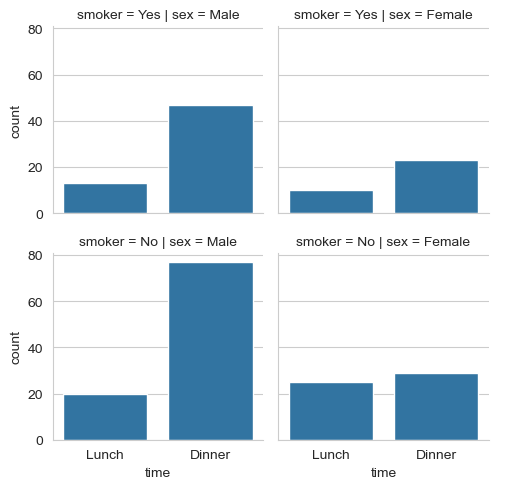

In [6]:
# Lounas- ja päivällisseurueiden lukumäärät sukupuolen ja tupakoinnin mukaan
sns.catplot(data=tips, x='time', col='sex', row='smoker', kind='count', height=2.5)

## histplot

Sopii määrällisen muuttujan luokitellun jakauman esittämiseen: https://seaborn.pydata.org/generated/seaborn.histplot.html

<Axes: xlabel='total_bill', ylabel='Count'>

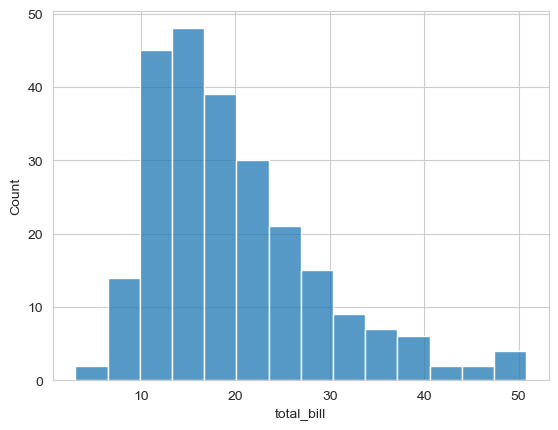

In [7]:
sns.histplot(data=tips, x='total_bill')    # Laskun loppusummien jakauma

<Axes: xlabel='total_bill', ylabel='Count'>

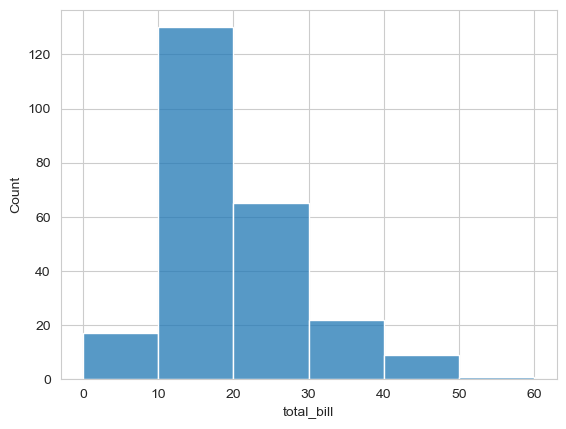

In [8]:
# Itse määritellyt luokkarajat
sns.histplot(data=tips, x='total_bill', bins=[0, 10, 20, 30, 40, 50, 60])

histplot sopii käytettäväksi **displot**-funktion yhteydessä (`kind='hist'`). Tällöin voin esittää useita histogrammeja kategoristen muuttujien määräämille ryhmille:
https://seaborn.pydata.org/generated/seaborn.displot.html

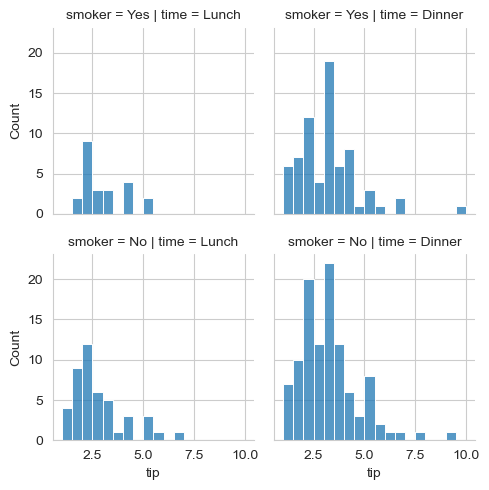

In [9]:
# tipin jakaumat tupakoinnin ja ajan mukaan
sns.displot(data=tips, x='tip', row='smoker', col='time', kind='hist', height=2.5)

## barplot

Sopii keskiarvojen esittämiseen. Musta viiva havainnoillistaa virhemarginaalin (luottamusväli): https://seaborn.pydata.org/generated/seaborn.barplot.html

<Axes: xlabel='day', ylabel='tip'>

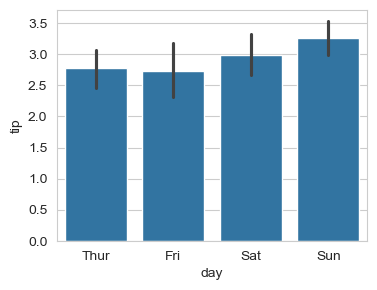

In [10]:
# Eri päivien tippien keskiarvot
plt.figure(figsize=(4, 3))
sns.barplot(data=tips, x='day', y='tip')

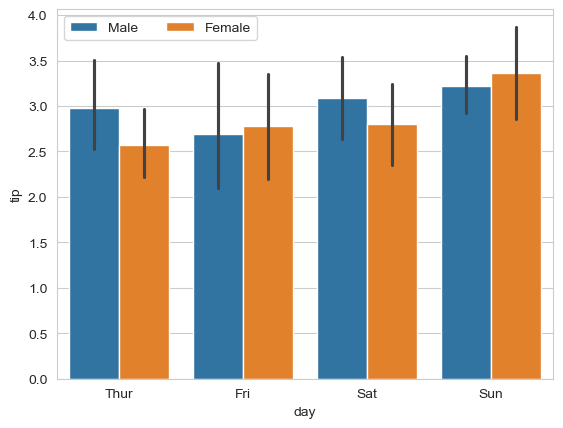

In [11]:
# Eri päivien tippien keskiarvot sukupuolen mukaan
sns.barplot(data=tips, x='day', y='tip', hue='sex')
plt.legend(ncol=2)

barplot sopii käytettäväksi **catplot**-funktion yhteydessä (`kind='bar'`). Tällöin voin esittää useita kaavioita kategoristen muuttujien määräämille ryhmille: https://seaborn.pydata.org/generated/seaborn.catplot.html

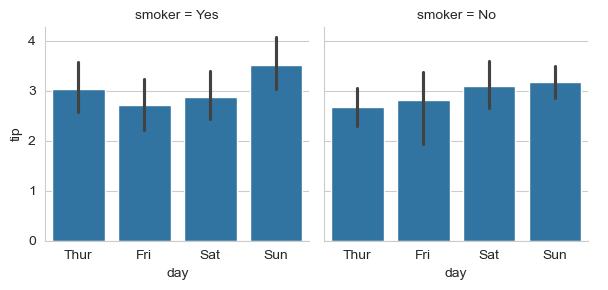

In [12]:
# Eri päivien tippien keskiarvot tupakoinnin mukaan
sns.catplot(data=tips, x='day', y='tip', col='smoker', kind='bar', height=3)

## boxplot

Havainnollistaa viiden luvun yhteenvedon (pienin, alaneljännes, mediaani, yläneljännes, suurin). Muista selvästi poikkeavat havainnot esitetään erillisinä pisteinä. Lue lisää: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='tip'>

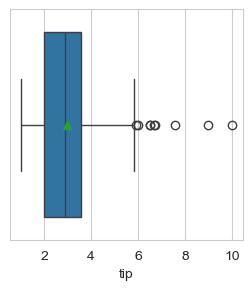

In [13]:
# Tipin suuruuden jakauma tunnuslukuina
plt.figure(figsize=(3, 3))
sns.boxplot(data=tips, x='tip', showmeans=True)

<Axes: xlabel='time', ylabel='tip'>

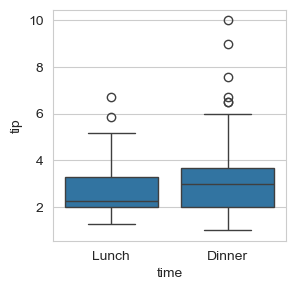

In [14]:
# Tipin suuruus lounas- ja päivällisseurueille
plt.figure(figsize=(3, 3))
sns.boxplot(data=tips, x='time', y='tip')

boxplot sopii käytettäväksi **catplot**-funktion yhteydessä (`kind='box'`). Tällöin voin esittää useita kaavioita kategoristen muuttujien määräämille ryhmille: https://seaborn.pydata.org/generated/seaborn.catplot.html

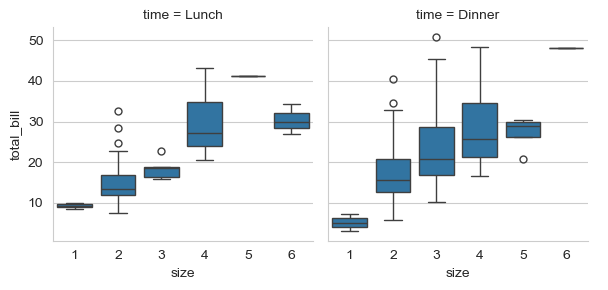

In [15]:
# Laskun loppusumma seurueen koon ja ajan mukaan
sns.catplot(data=tips, x='size', y='total_bill', col='time', kind='box', height=3)

<h2>scatterplot</h2>

Havainnollistaa kahden määrällisen muuttujan välisen riippuvuuden: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: xlabel='total_bill', ylabel='tip'>

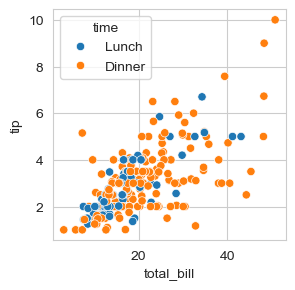

In [16]:
plt.figure(figsize=(3, 3))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')

scatterplot sopii käytettäväksi **relplot**-funktion yhteydessä (`kind='scatter'`). Tällöin voin esittää useita kaavioita kategoristen muuttujien määräämille ryhmille: https://seaborn.pydata.org/generated/seaborn.relplot.html

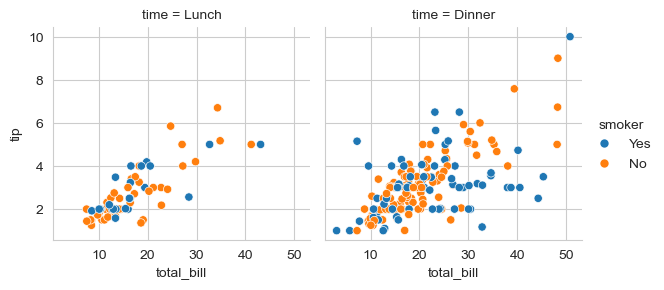

In [17]:
# Laskun loppusumma ajan mukaan. Värierottelu tupakoinnin mukaan.
sns.relplot(data=tips, x='total_bill', y='tip', col='time', hue='smoker', kind='scatter', height=3)

## jointplot

Havainnollistaa kahden määrällisen muuttujan välisen riippuvuuden ja esittää samalla kummankin muuttujan jakaumat: http://seaborn.pydata.org/generated/seaborn.jointplot.html

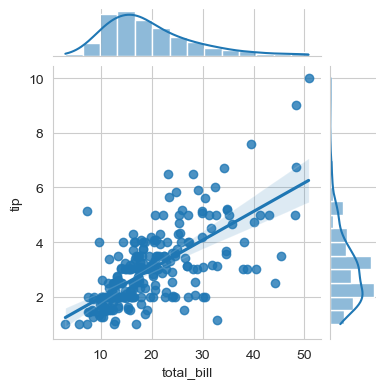

In [18]:
# Laskun loppusumman ja tipin välinen riippuvuus
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg', height=4)

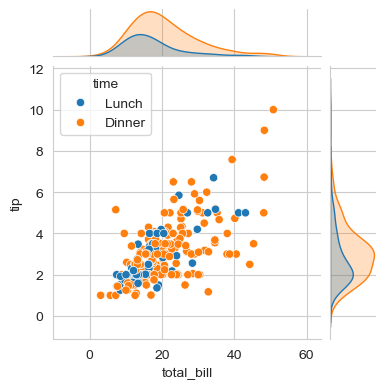

In [19]:
# Värierottelu ajan mukaan
sns.jointplot(data=tips, x='total_bill', y='tip', hue='time', height=4)

## Lisätietoa

Lisätietoa löydät kaaviolaji-kohtaisista muistioistani:

* countplot ja catplot https://nbviewer.org/github/taanila/kaaviot/blob/master/sns_count.ipynb 
* histplot ja displot https://nbviewer.org/github/taanila/kaaviot/blob/master/sns_hist.ipynb 
* barplot ja catplot https://nbviewer.org/github/taanila/kaaviot/blob/master/sns_bar.ipynb  
* boxplot ja catplot https://nbviewer.org/github/taanila/kaaviot/blob/master/sns_box.ipynb 
* scatterplot ja relplot, pairplot https://nbviewer.org/github/taanila/kaaviot/blob/master/sns_scatter.ipynb 